In [1]:
from importlib import reload ,import_module
import module.utilize as utilize
import module.multiVariant as multiVariant
import module.singleVariant as singleVariant
import module.multiHistogramBase as multiHistogramBase
import numpy as np
from numba import njit,jit, float32
import module.singleVariantCopulaBase as CopulaBase
from tqdm import tqdm
import time

reload(utilize)
reload(multiVariant)
reload(singleVariant)
reload(multiHistogramBase)
reload(CopulaBase)

attribute_names=np.array(["phi_grav","particle_mass_density","zmom","ymom"])
incremental_number=300
all_ensamble_data=np.empty([0,incremental_number,64,64,64])

for name in attribute_names:
    data=utilize.readFiles(name,incremental_number)
    data=data.reshape(1,incremental_number,64,64,64)
    all_ensamble_data=np.append(all_ensamble_data,data,axis=0)

#print(all_ensamble_data.shape)
#print(all_ensamble_data[0].shape)
covBlockSize=5
dataBlockSize=5
binsNumber=128
sizeZ=20
sizeY=20
sizeX=20
minMaxBlockSize=2
isMinMax=False
#copulaModel=multiVariant.multiDistCopula3D(all_ensamble_data,dataBlockSize,covBlockSize,binsNumber,[sizeZ,sizeY,sizeX],minMaxBlockSize,isMinMax)

#conditions=np.array([[0,1e5],[3e10,5e10]])
#copulaModel.calProbByConditionGT(conditions,sizeZ=sizeZ,sizeY=sizeY,sizeX=sizeX)

model=multiVariant.multiDistCopula3D.load(f"Nyx_{attribute_names.shape[0]}varaibles_300members_128Bins_dBlock5_cBlock2_new")

#conditions=np.array([[0,1e5],[3e10,5e10]])
#model.calProbByCondition(conditions,sizeZ=sizeZ,sizeY=sizeY,sizeX=sizeX)

multiHistBlockSize=2
multiBinsNumber=128
multiHistModel=multiHistogramBase.multiHistogramModel(all_ensamble_data,blockSize=multiHistBlockSize,binsNumber=multiBinsNumber)
multiHistModel.fit()

print(multiHistModel.countNoneZeros())
"""
copulaBlockSize=2
copulaBaseModel=CopulaBase.multiVariantCopulaBase(all_ensamble_data,copulaBlockSize)
copulaBaseModel.fit()
"""


57.710357666015625


'\ncopulaBlockSize=2\ncopulaBaseModel=CopulaBase.multiVariantCopulaBase(all_ensamble_data,copulaBlockSize)\ncopulaBaseModel.fit()\n'

(300, 4)
(300, 4)
(300, 4)
(113, 4)


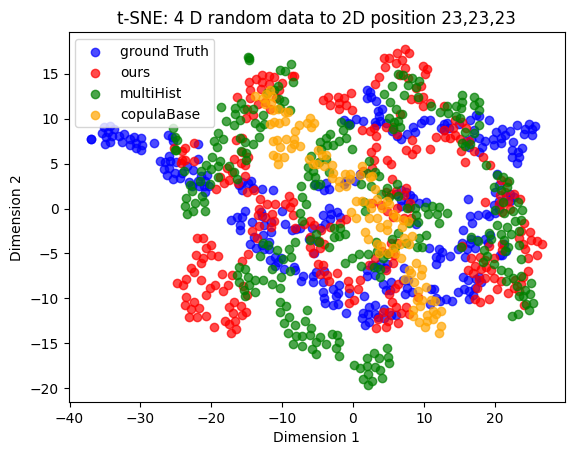

In [62]:

#conditions=np.array([[0,1e5],[3e10,5e10]])
#model.calProbByCondition(conditions,sizeZ=sizeZ,sizeY=sizeY,sizeX=sizeX)
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
posZ=23
posY=23
posX=23

gt_data=[]
for i in range(attribute_names.shape[0]):
    data=np.array(all_ensamble_data[i,:,posZ,posY,posX],dtype=np.float32)
    data=data.flatten()
    gt_data.append(data)

gt_data=np.array(gt_data,dtype=np.float32)
gt_data=gt_data.T

multiHistSamples=multiHistModel.sampleByPos(posZ,posY,posX,size=300)

copulaBaseSamples=copulaBaseModel.sampleByPos(posZ,posY,posX,size=1000)

oursSamples=model.sampleByPos(posZ,posY,posX,size=300)

print(oursSamples.shape)
print(gt_data.shape)
print(multiHistSamples.shape)
print(copulaBaseSamples.shape)

tsne = TSNE(n_components=2, random_state=42, perplexity=20, max_iter=500)
gt_tsne = tsne.fit_transform(gt_data)

tsne = TSNE(n_components=2, random_state=42, perplexity=20, max_iter=500)
reconst_tsne = tsne.fit_transform(oursSamples)

tsne = TSNE(n_components=2, random_state=42, perplexity=20, max_iter=500)
multiHist_tsne = tsne.fit_transform(multiHistSamples)

tsne = TSNE(n_components=2, random_state=42, perplexity=20, max_iter=500)
copulaBase_tsne = tsne.fit_transform(copulaBaseSamples)

plt.scatter(gt_tsne[:, 0], gt_tsne[:, 1], c='blue', alpha=0.7,label="ground Truth")
plt.scatter(reconst_tsne[:, 0], reconst_tsne[:, 1], c='red', alpha=0.7,label="ours")
plt.scatter(multiHist_tsne[:, 0], multiHist_tsne[:, 1], c='green', alpha=0.7,label="multiHist")
plt.scatter(copulaBase_tsne[:, 0], copulaBase_tsne[:, 1], c='orange', alpha=0.7,label="copulaBase")
plt.legend()
plt.title(f"t-SNE: {attribute_names.shape[0]} D random data to 2D position {posZ},{posY},{posX}")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()